# ANSI Application analysis

In [1]:
import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plotter
from scipy.stats import pearsonr, probplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
matplotlib.rcParams['agg.path.chunksize'] = 10000

In [2]:
def view_boxplot(df):
    %matplotlib
    df.boxplot()
    plotter.show()

## CPU data

In [3]:
cpu_df = pandas.read_csv('data/ansi_final/ansi_final_cpu.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [4]:
#cpu_df.columns

In [5]:
cpu_df = cpu_df.clip(lower=0, upper=1000)
#view_boxplot(cpu_df)

## Network TX

In [6]:
txnet_df = pandas.read_csv('data/ansi_final/ansi_final_network_tx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [7]:
#txnet_df.columns

In [8]:
txnet_df = txnet_df.clip(lower=0, upper=50000)
#view_boxplot(txnet_df)

## Network RX

In [9]:
rxnet_df = pandas.read_csv('data/ansi_final/ansi_final_network_rx.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [10]:
#rxnet_df.columns

In [11]:
rxnet_df = rxnet_df.clip(lower=0, upper=15000)
#view_boxplot(rxnet_df)

## Disk IO data

In [12]:
disk_df = pandas.read_csv('data/ansi_final/ansi_final_disk_io.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [13]:
#disk_df.columns

In [14]:
disk_df = disk_df.clip(lower=0, upper=4000)
#view_boxplot(disk_df)

## Context switching

In [15]:
context_df = pandas.read_csv('data/ansi_final/ansi_final_context.csv', index_col='Time').drop('Unnamed: 0', axis=1)

In [16]:
#context_df.columns

In [17]:
context_df = context_df.clip(lower=0, upper=5000)
#view_boxplot(context_df)

## Seperate into proper dataframes for each node

In [18]:
dframes = [cpu_df, txnet_df, rxnet_df, context_df, disk_df]
node = {}

for i in range(1,13):
    frames = []
    
    for dframe in dframes:
        columns = list(filter(lambda x: f'bb{i}l' in x, dframe.columns))
        frames.append(dframe[columns])

    node[i] = pandas.concat(frames, join='inner', axis=1).fillna(0)[:68300]

In [19]:
for i in range(1,13):
    print(node[i].shape)
    
for i in range(len(node[1].columns)):
    print(f"{i}: {node[1].columns[i]}")

(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
(68300, 29)
0: cpu_value host bb1localdomain type_instance idle
1: cpu_value host bb1localdomain type_instance interrupt
2: cpu_value host bb1localdomain type_instance nice
3: cpu_value host bb1localdomain type_instance softirq
4: cpu_value host bb1localdomain type_instance steal
5: cpu_value host bb1localdomain type_instance system
6: cpu_value host bb1localdomain type_instance user
7: cpu_value host bb1localdomain type_instance wait
8: interface_tx host bb1localdomain instance lo type if_dropped
9: interface_tx host bb1localdomain instance lo type if_errors
10: interface_tx host bb1localdomain instance lo type if_octets
11: interface_tx host bb1localdomain instance lo type if_packets
12: interface_tx host bb1localdomain instance wlan0 type if_dropped
13: interface_tx host bb1localdomain instance wlan0 type if_errors
14: interface_tx host bb1localdomain i

## Get data

In [20]:
data_matrices = []

for i in range(1,13):
    data_matrices.append(node[i].as_matrix())
    
data = numpy.vstack(data_matrices)

In [21]:
data.shape

(819600, 29)

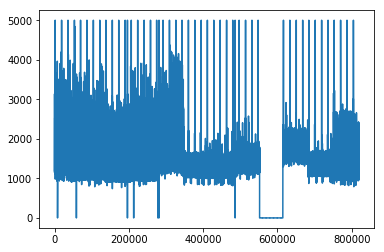

(819600, 29)


In [22]:
tdata = data[:,24]
plotter.plot(tdata.T)
plotter.show()
print(data.shape)

In [23]:
#data = data[:,24]

## Prepare scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler = MinMaxScaler()

In [25]:
scaler.fit(data)
del data

---

## Correrlation measurement

---

------

-----

In [26]:
for i in range(len(data_matrices)):
    
    transformed = scaler.transform(data_matrices[i])
    data_matrices[i] = transformed

X = numpy.stack(data_matrices[:4], axis=1)
test = numpy.stack(data_matrices[4:], axis=1)
print(X.shape)
print(test.shape)

(68300, 4, 29)
(68300, 8, 29)


In [27]:
X = X.transpose((1,0,2))
test = test.transpose((1,0,2))

In [28]:
X.shape

(4, 68300, 29)

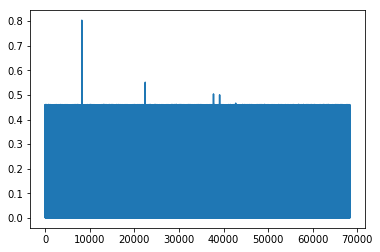

In [38]:
#mean = pandas.Series(test[1,:,0]).rolling(window=100).mean()
#print(mean.shape)
#plotter.plot(mean)
plotter.plot(X[3,:,0])
plotter.show()

In [33]:
ano = (X[1,:,25] > 0.2) * 1.0
numpy.sum(ano)
print(ano.shape)

(68300,)


In [34]:
for i in range(ano.shape[0]):
    if ano[i] > 0.0:
        print(i)

1745
1751
1752
1756
1757
1762
1763
1769
1770
1775
1780
1787
1788
1794
1800
1801
1806
1807
1813
1814
1819
1820
1825
1826
1831
1832
1834


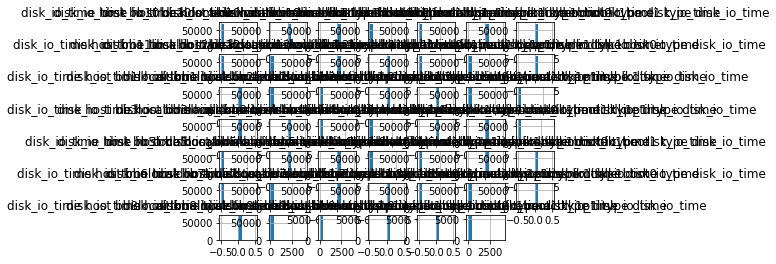

In [32]:
disk_df.hist()
plotter.show()

In [36]:
cpu_df.iloc[42830:]

,cpu_value host bb1localdomain type_instance idle,cpu_value host bb1localdomain type_instance interrupt,cpu_value host bb1localdomain type_instance nice,cpu_value host bb1localdomain type_instance softirq,cpu_value host bb1localdomain type_instance steal,cpu_value host bb1localdomain type_instance system,cpu_value host bb1localdomain type_instance user,cpu_value host bb1localdomain type_instance wait,cpu_value host bb10localdomain type_instance idle,cpu_value host bb10localdomain type_instance interrupt,...,cpu_value host bb8localdomain type_instance user,cpu_value host bb8localdomain type_instance wait,cpu_value host bb9localdomain type_instance idle,cpu_value host bb9localdomain type_instance interrupt,cpu_value host bb9localdomain type_instance nice,cpu_value host bb9localdomain type_instance softirq,cpu_value host bb9localdomain type_instance steal,cpu_value host bb9localdomain type_instance system,cpu_value host bb9localdomain type_instance user,cpu_value host bb9localdomain type_instance wait
Time,,,,,,,,,,,,,,,,,,,,,
2018-03-15 15:34:10+00:00,330.333333,0.0,0.0,0.000000,0.0,15.166667,146.333333,0.000000,478.166667,0.0,...,6.833333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:15+00:00,459.166667,0.0,0.0,0.000000,0.0,17.833333,12.666667,0.000000,478.500000,0.0,...,5.500000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:20+00:00,175.500000,0.0,0.0,0.000000,0.0,12.166667,308.333333,0.000000,479.500000,0.0,...,7.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:25+00:00,0.000000,0.0,0.0,0.000000,0.0,9.833333,490.166667,0.000000,479.500000,0.0,...,8.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:30+00:00,0.000000,0.0,0.0,0.000000,0.0,11.833333,488.500000,0.000000,480.000000,0.0,...,9.500000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:35+00:00,125.000000,0.0,0.0,0.500000,0.0,14.666667,358.000000,0.500000,480.666667,0.0,...,7.833333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:40+00:00,459.000000,0.0,0.0,1.166667,0.0,12.000000,15.333333,0.500000,480.333333,0.0,...,7.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:45+00:00,372.000000,0.0,0.0,0.333333,0.0,13.500000,103.666667,0.000000,479.666667,0.0,...,5.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15 15:34:50+00:00,4.000000,0.0,0.0,0.000000,0.0,9.833333,485.666667,0.000000,480.333333,0.0,...,6.833333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
